# Diabetes Classification

## About Dataset

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.<br> <br>

### Content
The datasets consists of several medical predictor variables and one target variable, "Outcome". Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on. <br><br>


# Library Import


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.metrics import r2_score,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split,GridSearchCV

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier




# EDA

In [38]:
data=pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1


In [39]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [41]:
data.isnull().sum() #no missing values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [42]:
data.Outcome.value_counts() # 0 = no diabetes, 1= diabetes

0    500
1    268
Name: Outcome, dtype: int64

[]

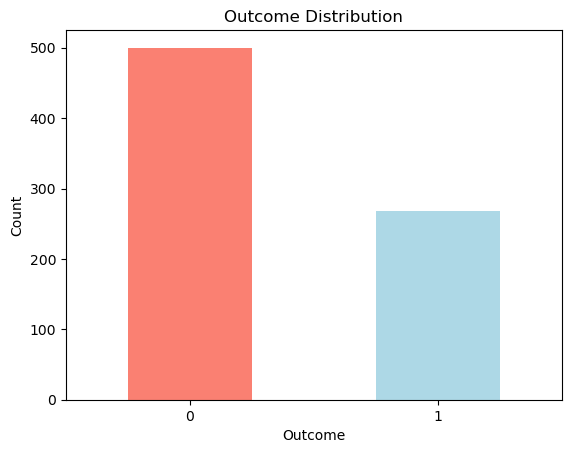

In [43]:
data["Outcome"].value_counts().plot(kind="bar", color=["salmon", "lightblue"])
plt.xticks(rotation=0)
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.title("Outcome Distribution")
plt.plot()

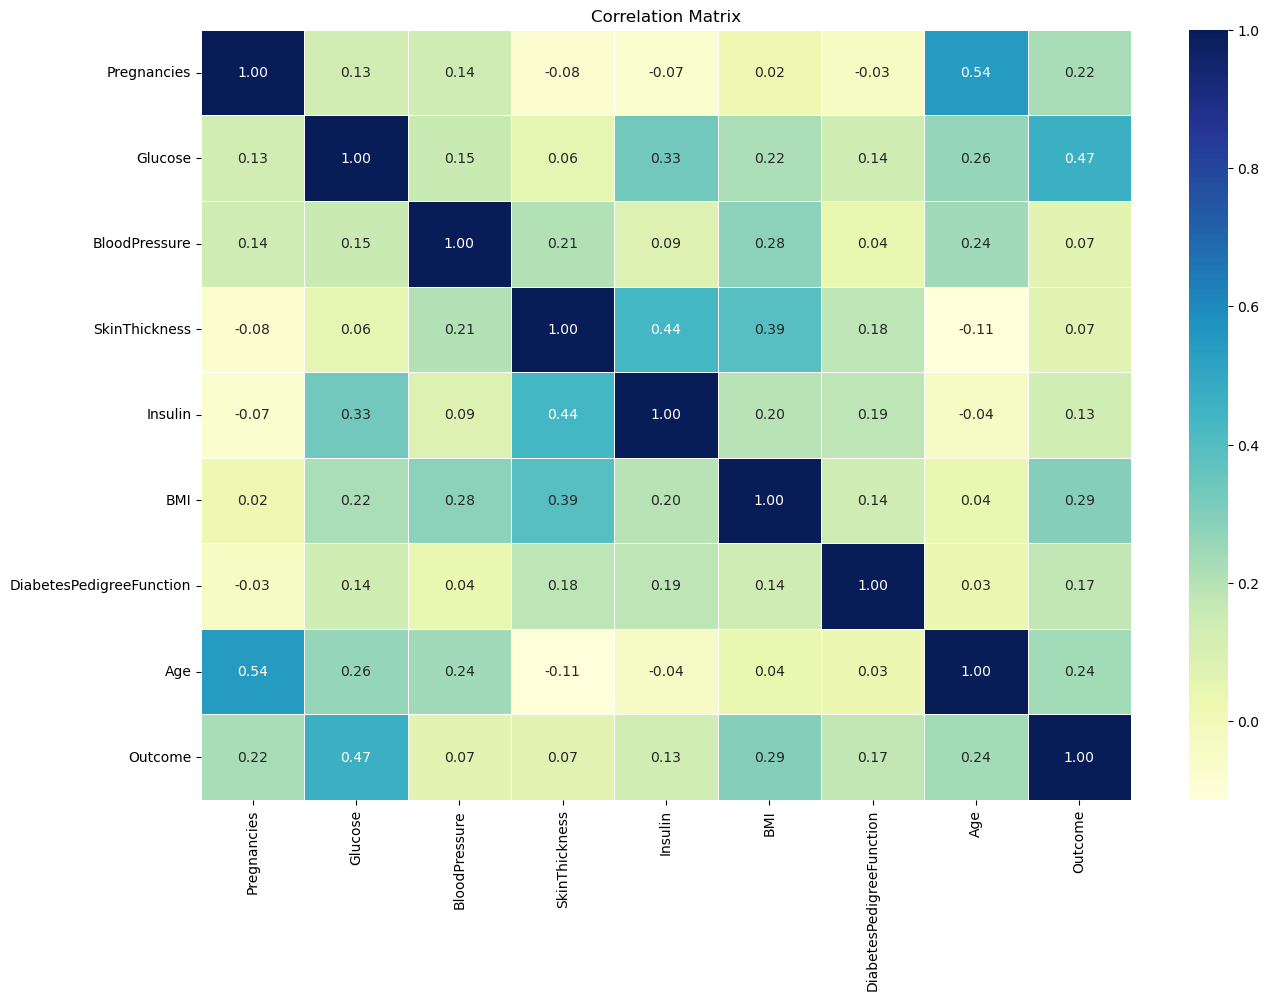

In [44]:
#correlation matrix
corr_matrix = data.corr()   
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


[]

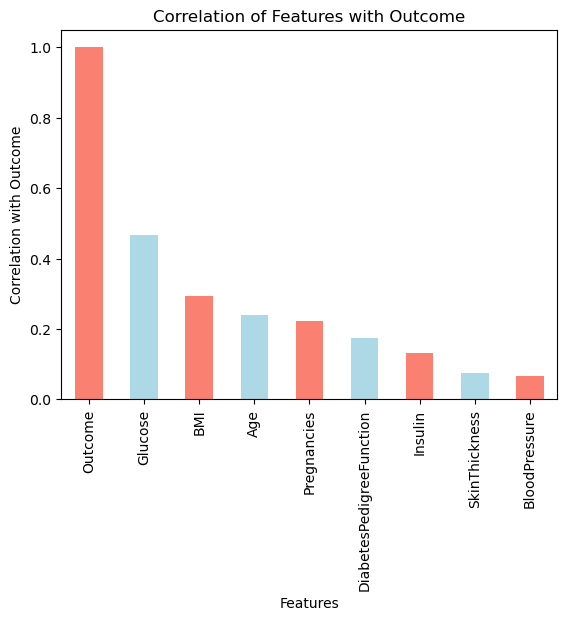

In [45]:
data.corr()["Outcome"].sort_values(ascending=False).plot(kind="bar",
                                                          color=["salmon", "lightblue", "salmon", "lightblue", "salmon", "lightblue", "salmon", "lightblue", "salmon"])

plt.xlabel("Features")
plt.ylabel("Correlation with Outcome")
plt.title("Correlation of Features with Outcome")
plt.plot()

# Pure Model Selection

In [46]:
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (614, 8)
X_test shape:  (154, 8)
y_train shape:  (614,)
y_test shape:  (154,)


In [47]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          LGBMClassifier(),
          XGBClassifier(),
          CatBoostClassifier(verbose=False),
          RidgeClassifier()]



modelNames = ["LR", "KNN", "CART", "RF", "GB", "LightGBM", "XGB", "CatBoost", "Ridge"]
scores = []

for model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    skor = f1_score(y_test, yhat)
    scores.append(skor)

data = {'Model': modelNames, 'F1 Score': scores}
df = pd.DataFrame(data)

fig = px.bar(df, x='Model', y='F1 Score', text='F1 Score', labels={'F1 Score': 'F1 Score'},
             title='F1 Score for Model Performances', color='Model')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(xaxis_title='Model', yaxis_title='F1 Score', yaxis_range=[0, 1])

fig.show()

In [48]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          LGBMClassifier(),
          XGBClassifier(),
          CatBoostClassifier(verbose=False),
          RidgeClassifier()]



modelNames = ["LR", "KNN", "CART", "RF", "GB", "LightGBM", "XGB", "CatBoost", "Ridge"]
scores = []

for model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    skor = accuracy_score(y_test, yhat)
    scores.append(skor)

data = {'Model': modelNames, 'F1 Score': scores}
df = pd.DataFrame(data)

fig = px.bar(df, x='Model', y='F1 Score', text='F1 Score', labels={'F1 Score': 'F1 Score'},
             title='Accuracy Score for Model Performances', color='Model')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(xaxis_title='Model', yaxis_title='Accuracy Score', yaxis_range=[0, 1])

fig.show()

# Best 3 Model's Detailed Scores (Ridge,CatBoost and CART)

## Ridge Classifier

In [49]:
ridge=RidgeClassifier().fit(X_train,y_train)

y_pred=ridge.predict(X_test)

In [50]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Metrik değerlerini bir liste içinde sakla
scores = [f1, precision, recall, accuracy]
labels = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

# Verileri bir DataFrame'e dönüştür
data = {'Metric': labels, 'Score': scores}
df = pd.DataFrame(data)

# Çubuk grafik kullanarak sonuçları görselleştir
fig = px.bar(df, x='Metric', y='Score', color='Metric', title='Ridge Model Classification Results')
fig.show()

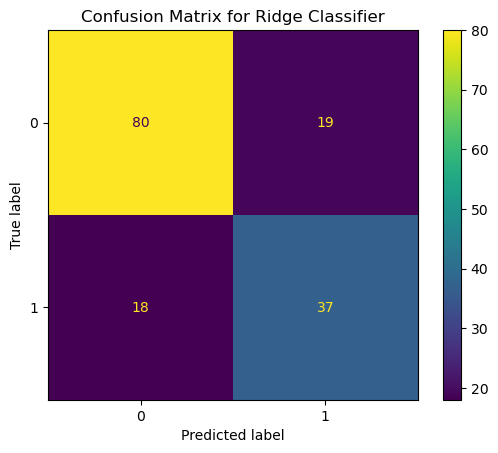

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ridge.classes_)
disp.plot()
plt.title("Confusion Matrix for Ridge Classifier")
plt.show()

## CatBoost Classifier

In [52]:
catboost=CatBoostClassifier(verbose=False).fit(X_train,y_train)
y_pred=catboost.predict(X_test)

In [53]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Metrik değerlerini bir liste içinde sakla
scores = [f1, precision, recall, accuracy]
labels = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

# Verileri bir DataFrame'e dönüştür
data = {'Metric': labels, 'Score': scores}
df = pd.DataFrame(data)

# Çubuk grafik kullanarak sonuçları görselleştir
fig = px.bar(df, x='Metric', y='Score', color='Metric', title='CatBoost Model Classification Results')
fig.show()

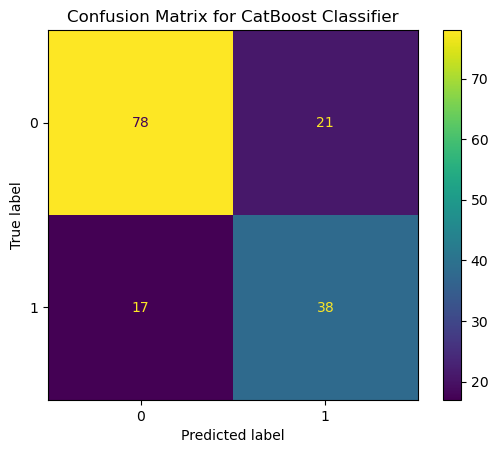

In [54]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ridge.classes_)
disp.plot()
plt.title("Confusion Matrix for CatBoost Classifier")
plt.show()

## CART Classifier 

In [55]:
cart=DecisionTreeClassifier().fit(X_train,y_train)
y_pred=cart.predict(X_test)

In [56]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Metrik değerlerini bir liste içinde sakla
scores = [f1, precision, recall, accuracy]
labels = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

# Verileri bir DataFrame'e dönüştür
data = {'Metric': labels, 'Score': scores}
df = pd.DataFrame(data)

# Çubuk grafik kullanarak sonuçları görselleştir
fig = px.bar(df, x='Metric', y='Score', color='Metric', title='CART Model Classification Results')
fig.show()

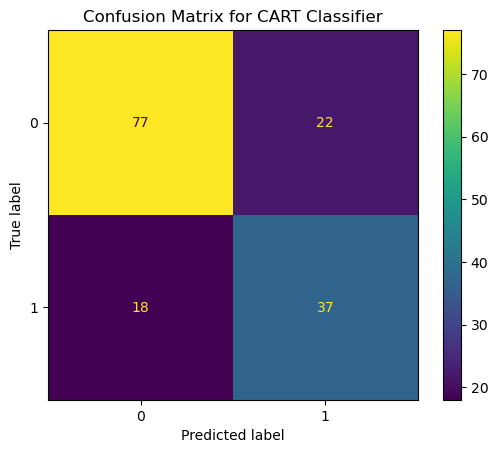

In [57]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ridge.classes_)
disp.plot()
plt.title("Confusion Matrix for CART Classifier")
plt.show()